<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231027_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀, 회귀트리

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
def get_model_cv_pred(model, X_data, y_target):
    neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse=np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse)
    print('====', model.__class__.__name__, '====')
    print('avg_rmse : ', avg_rmse)

In [ ]:
boston_df = pd.read_csv('./drive/MyDrive/data/boston_house.csv')

In [ ]:
y_target = boston_df.PRICE

In [ ]:
X_data = boston_df.iloc[:, 1:-1]

In [ ]:
dt = DecisionTreeRegressor(max_depth=4)
rf = RandomForestRegressor(n_estimators=1000)
gb = GradientBoostingRegressor(n_estimators=1000)
xgb_r = XGBRegressor(n_estimators=1000)
lgbm_r = LGBMRegressor(n_estimators=1000)

models = [dt, rf, gb, xgb_r, lgbm_r]

for model in models:
    get_model_cv_pred(model, X_data, y_target)

==== DecisionTreeRegressor ====
avg_rmse :  4.411268717750432
==== RandomForestRegressor ====
avg_rmse :  4.437663097995948
==== GradientBoostingRegressor ====
avg_rmse :  4.438240251076385
==== XGBRegressor ====
avg_rmse :  4.404310208148947
==== LGBMRegressor ====
avg_rmse :  4.43627964635346


In [ ]:
rf.fit(X_data, y_target)

RandomForestRegressor(n_estimators=1000)

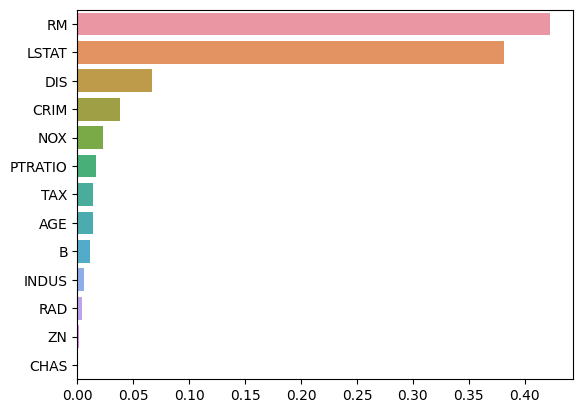

In [ ]:
ftr_s = pd.Series(data=rf.feature_importances_, index = X_data.columns)
ftr_s = ftr_s.sort_values(ascending=False)
sns.barplot(x=ftr_s, y=ftr_s.index)
plt.show()

In [ ]:
df = boston_df[['RM']]
df['PRICE'] = y_target.values

<ipython-input-12-632627cb4e52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE'] = y_target.values


In [ ]:
df

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [ ]:
df_s = df.sample(n=100, random_state=0)

In [ ]:
df_s.shape

(100, 2)

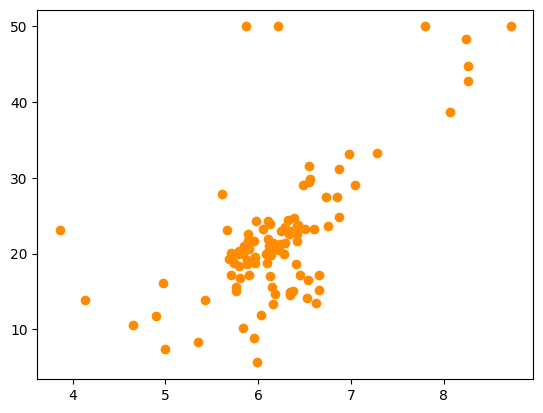

In [ ]:
plt.figure()
plt.scatter(df_s.RM, df_s.PRICE, c='darkorange')

In [ ]:
lr = LinearRegression()
rf2 = DecisionTreeRegressor(max_depth=2)
rf7 = DecisionTreeRegressor(max_depth=7)

X = df_s.RM.values.reshape(-1, 1)
y = df_s.PRICE.values.reshape(-1, 1)

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

In [ ]:
lr.fit(X, y)
rf2.fit(X, y)
rf7.fit(X, y)

DecisionTreeRegressor(max_depth=7)

In [ ]:
X_test = np.arange(3.5, 8.5, 0.04).reshape(-1, 1)

In [ ]:
lr_pred = lr.predict(X_test)
rf2_pred = rf2.predict(X_test)
rf7_pred = rf7.predict(X_test)

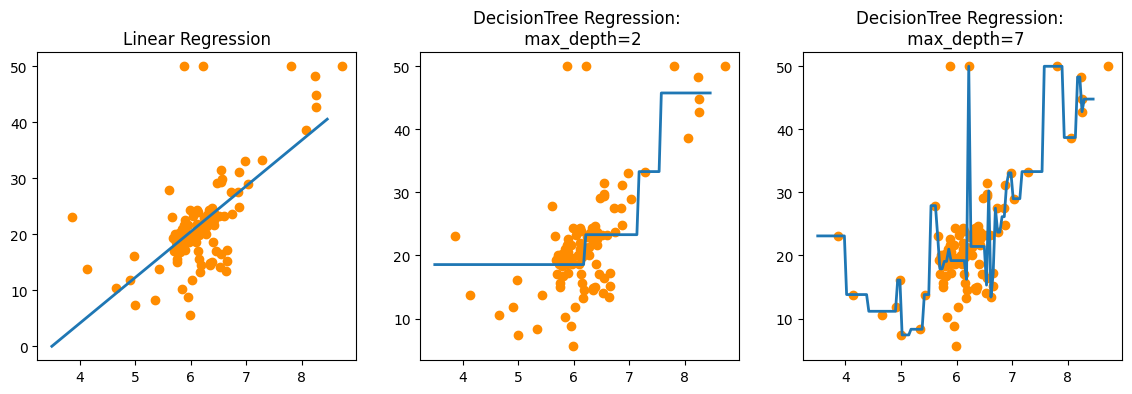

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(df_s.RM, df_s.PRICE, c='darkorange')
ax1.plot(X_test, lr_pred, linewidth=2)

ax2.set_title('DecisionTree Regression: \n max_depth=2')
ax2.scatter(df_s.RM, df_s.PRICE, c='darkorange')
ax2.plot(X_test, rf2_pred, linewidth=2)

ax3.set_title('DecisionTree Regression: \n max_depth=7')
ax3.scatter(df_s.RM, df_s.PRICE, c='darkorange')
ax3.plot(X_test, rf7_pred, linewidth=2)

In [ ]:
ls ./drive/MyDrive/data/bike_train*

./drive/MyDrive/data/bike_train.csv


In [ ]:
bike_df = pd.read_csv('./drive/MyDrive/data/bike_train.csv') #count 를 예측

In [ ]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.shape

(10886, 12)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


1. datetime -> year, month, day, hour 만들어주기

2. casual, registered, datetime : drop

3. 단순선형회귀 모델을 사용하여 잔차가 제일 큰 순서로 5개 값을 출력하시오

잔차 = 실제값 - 예측값

잔차가 제일 큰 순서로 5개 표출

    실제값, 예측값, 잔차 표출

In [ ]:
bike_df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour

In [ ]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [ ]:
y = bike_df['count']

X = bike_df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)

In [ ]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [ ]:
bike_df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

residuals = y_test - lr_pred

sorted_residuals= residuals.sort_values(ascending = False)

sorted_residuals.head(5)


9887     618.838108
10870    542.295861
9599     539.389028
7655     532.632898
9728     513.997536
Name: count, dtype: float64

In [ ]:
result_df = pd.DataFrame(y_test.values, columns=['real_count'])

In [ ]:
result_df['pred_count'] = lr_pred

In [ ]:
result_df['diff'] = np.abs(result_df['real_count']-result_df['pred_count'])

In [ ]:
result_df.sort_values('diff', ascending=False).head(5)

,real_count,pred_count,diff
2072,835,216.161892,618.838108
1671,678,135.704139,542.295861
1901,738,198.610972,539.389028
1048,745,212.367102,532.632898
1172,806,292.002464,513.997536


In [ ]:
evaluate_regr(y_test, lr_pred)

RMSE: 215.0029, MAE: 186.9975


<Axes: >

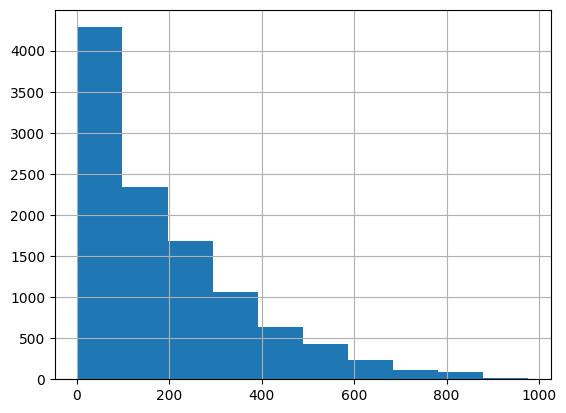

In [ ]:
y.hist()

In [ ]:
y_log_transform = np.log1p(y)

<Axes: >

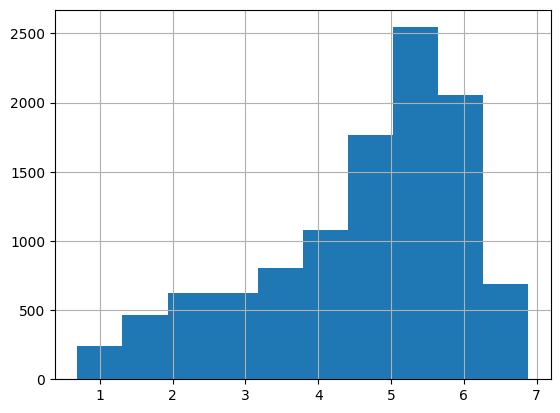

In [ ]:
y_log_transform.hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log_transform,
                                                    test_size=0.2, random_state=156 )

In [ ]:
lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [ ]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [ ]:
y_test_exp

1089     21.0
7688    626.0
260      54.0
6357      3.0
7393    190.0
        ...  
4298      3.0
4777     17.0
1460    356.0
3311    136.0
7403    323.0
Name: count, Length: 2178, dtype: float64

In [ ]:
pred_exp

array([ 81.18117488, 457.33840725,  15.62651639, ..., 196.53744226,
       259.86367091, 320.35844034])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def evaluate_regr(y, pred):
    rmse_val = np.sqrt(mean_squared_error(y, pred))
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSE: {rmse_val:.4F}, MAE: {mae_val:.4F}')

In [ ]:
evaluate_regr(y_test_exp, pred_exp)

RMSE: 154.5257, MAE: 103.0838


In [ ]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [ ]:
coef = pd.Series(lr_reg.coef_, index=X.columns)

In [ ]:
coef_sort = coef.sort_values(ascending=False)

<Axes: >

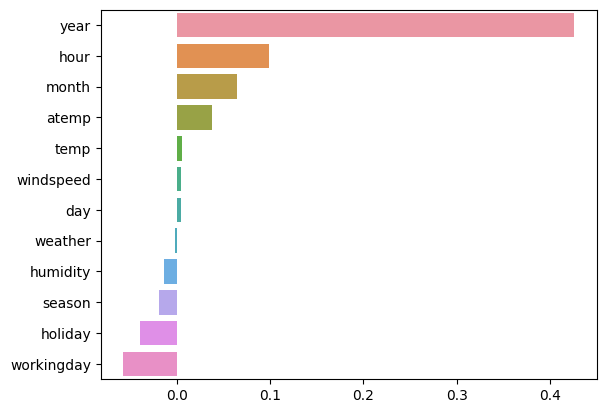

In [ ]:
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


2013, 2014

범주형 데이터가 수치형 -> one-hot 인코딩 -> pd.get_dummies

year, month, hour, day, season, holiday, workingday, weather

In [ ]:
X.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
X.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
X.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
ex_df = pd.DataFrame({'season':['spring', 'summer', 'falll', 'winter', np.nan],
                      'temp':[10, 30, 20, 0, np.nan]})

In [ ]:
ex_df

,season,temp
0,spring,10.0
1,summer,30.0
2,falll,20.0
3,winter,0.0
4,NaN,NaN


In [ ]:
pd.get_dummies(ex_df['season'], dummy_na=True)

,falll,spring,summer,winter,NaN
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:
pd.get_dummies(ex_df['season'])

,falll,spring,summer,winter
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,0


In [ ]:
pd.get_dummies(ex_df, columns=['season'])

,temp,season_falll,season_spring,season_summer,season_winter
0,10.0,0,1,0,0
1,30.0,0,0,1,0
2,20.0,1,0,0,0
3,0.0,0,0,0,1
4,NaN,0,0,0,0


In [ ]:
X_features_ohe = pd.get_dummies(X, columns=['year', 'month', 'hour', 'day', 'season',
                                            'holiday', 'workingday', 'weather'])

In [ ]:
X_features_ohe

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0


In [ ]:
y_target_log = y_log_transform

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.2, random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 73), (2178, 73), (8708,), (2178,))

In [ ]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('===', model.__class__.__name__, '===')
    evaluate_regr(y_test, pred)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
lr_reg = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.01)
for model in [lr_reg, ridge, lasso]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

=== LinearRegression ===
RMSE: 92.8031, MAE: 61.1005
=== Ridge ===
RMSE: 93.4768, MAE: 61.3234
=== Lasso ===
RMSE: 107.1204, MAE: 69.0367


In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)

In [ ]:
coef_sort = coef.sort_values(ascending=False)[:10]

<Axes: >

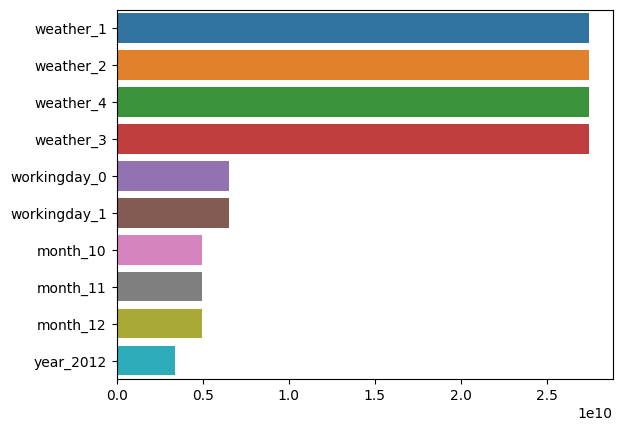

In [ ]:
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=1000)
gbm = GradientBoostingRegressor(n_estimators=1000)
xgb_r = XGBRegressor(n_estimators=1000)
lgbm_r = LGBMRegressor(n_estimators=1000)

In [ ]:
for model in [rf, gbm, xgb_r, lgbm_r]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

=== RandomForestRegressor ===
RMSE: 44.9745, MAE: 28.3003
=== GradientBoostingRegressor ===
RMSE: 46.5481, MAE: 28.3776
=== XGBRegressor ===
RMSE: 51.3717, MAE: 30.4273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 72
[LightGBM] [Info] Start training from score 4.596076
=== LGBMRegressor ===
RMSE: 44.5554, MAE: 27.2963


In [ ]:
ls ./drive/MyDrive/data/hpr*

./drive/MyDrive/data/hpr_data.csv


In [ ]:
df = pd.read_csv('./drive/MyDrive/data/hpr_data.csv')

In [ ]:
df.head()

,ID,ftr_1,ftr_2,ftr_3,ftr_4,ftr_5,ftr_6,ftr_7,ftr_8,ftr_9,...,ftr_71,ftr_72,ftr_73,ftr_74,ftr_75,ftr_76,ftr_77,ftr_78,ftr_79,PRICE
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1460 non-null   int64  
 1   ftr_1   1460 non-null   int64  
 2   ftr_2   1460 non-null   object 
 3   ftr_3   1201 non-null   float64
 4   ftr_4   1460 non-null   int64  
 5   ftr_5   1460 non-null   object 
 6   ftr_6   91 non-null     object 
 7   ftr_7   1460 non-null   object 
 8   ftr_8   1460 non-null   object 
 9   ftr_9   1460 non-null   object 
 10  ftr_10  1460 non-null   object 
 11  ftr_11  1460 non-null   object 
 12  ftr_12  1460 non-null   object 
 13  ftr_13  1460 non-null   object 
 14  ftr_14  1460 non-null   object 
 15  ftr_15  1460 non-null   object 
 16  ftr_16  1460 non-null   object 
 17  ftr_17  1460 non-null   int64  
 18  ftr_18  1460 non-null   int64  
 19  ftr_19  1460 non-null   int64  
 20  ftr_20  1460 non-null   int64  
 21  ftr_21  1460 non-null   object 
 22  

In [ ]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
house_df= df.copy()

1. NaN 처리

2. Object 처리

3. LinearRegression 모델 수행

In [ ]:
house_df.head()

,ID,ftr_1,ftr_2,ftr_3,ftr_4,ftr_5,ftr_6,ftr_7,ftr_8,ftr_9,...,ftr_71,ftr_72,ftr_73,ftr_74,ftr_75,ftr_76,ftr_77,ftr_78,ftr_79,PRICE
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<ipython-input-121-b3a50c577ce2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df.PRICE)


<Axes: xlabel='PRICE', ylabel='Density'>

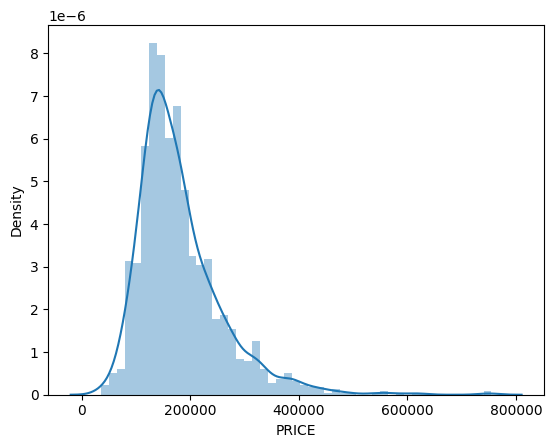

In [ ]:
sns.distplot(house_df.PRICE)

<ipython-input-122-b24cdaf83639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(house_df.PRICE))


<Axes: xlabel='PRICE', ylabel='Density'>

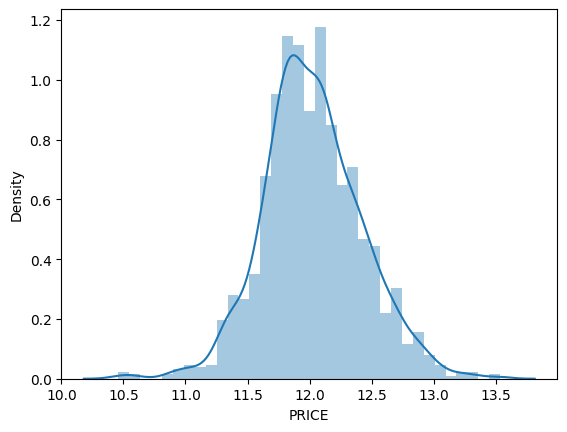

In [ ]:
sns.distplot(np.log1p(house_df.PRICE))

In [ ]:
house_df['PRICE'] = np.log1p(house_df.PRICE)

In [ ]:
house_df.head()

,ID,ftr_1,ftr_2,ftr_3,ftr_4,ftr_5,ftr_6,ftr_7,ftr_8,ftr_9,...,ftr_71,ftr_72,ftr_73,ftr_74,ftr_75,ftr_76,ftr_77,ftr_78,ftr_79,PRICE
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [ ]:
house_df.shape

(1460, 81)

In [ ]:
isnull_ser = house_df.isnull().sum()

In [ ]:
isnull_ser[isnull_ser>0]

ftr_3      259
ftr_6     1369
ftr_25       8
ftr_26       8
ftr_30      37
ftr_31      37
ftr_32      38
ftr_33      37
ftr_35      38
ftr_42       1
ftr_57     690
ftr_58      81
ftr_59      81
ftr_60      81
ftr_63      81
ftr_64      81
ftr_72    1453
ftr_73    1179
ftr_74    1406
dtype: int64

In [ ]:
isnull_ser[isnull_ser>0].sort_values(ascending=False)

ftr_72    1453
ftr_74    1406
ftr_6     1369
ftr_73    1179
ftr_57     690
ftr_3      259
ftr_58      81
ftr_59      81
ftr_60      81
ftr_63      81
ftr_64      81
ftr_32      38
ftr_35      38
ftr_33      37
ftr_31      37
ftr_30      37
ftr_26       8
ftr_25       8
ftr_42       1
dtype: int64

In [ ]:
1460*0.2

292.0

In [ ]:
idx = list(isnull_ser[isnull_ser>0].sort_values(ascending=False).index[:5])

In [ ]:
idx

['ftr_72', 'ftr_74', 'ftr_6', 'ftr_73', 'ftr_57']

In [ ]:
house_df.shape

(1460, 81)

In [ ]:
house_df.drop(idx, axis=1, inplace=True)

In [ ]:
house_df.shape

(1460, 76)

In [ ]:
isnull_ser = house_df.isnull().sum()

In [ ]:
isnull_ser[isnull_ser>0]

ftr_3     259
ftr_25      8
ftr_26      8
ftr_30     37
ftr_31     37
ftr_32     38
ftr_33     37
ftr_35     38
ftr_42      1
ftr_58     81
ftr_59     81
ftr_60     81
ftr_63     81
ftr_64     81
dtype: int64

In [ ]:
house_df.fillna(house_df.mean(), inplace=True)

<ipython-input-141-112b5b838bf9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_df.fillna(house_df.mean(), inplace=True)


In [ ]:
house_df.isnull().sum().sum()

520

In [ ]:
ncc = house_df.isnull().sum()[house_df.isnull().sum()>0]

In [ ]:
ncc

ftr_25     8
ftr_30    37
ftr_31    37
ftr_32    38
ftr_33    37
ftr_35    38
ftr_42     1
ftr_58    81
ftr_60    81
ftr_63    81
ftr_64    81
dtype: int64

In [ ]:
house_df.info()

In [ ]:
house_df.dtypes[ncc.index]

ftr_25    object
ftr_30    object
ftr_31    object
ftr_32    object
ftr_33    object
ftr_35    object
ftr_42    object
ftr_58    object
ftr_60    object
ftr_63    object
ftr_64    object
dtype: object

---
---
get_dummies 연습

In [ ]:
df_sample = pd.DataFrame({'one':[1, 2, 3, 4], 'two':['a', np.nan, 'a', 'b']})

In [ ]:
df_sample

,one,two
0,1,a
1,2,NaN
2,3,a
3,4,b


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   one     4 non-null      int64 
 1   two     3 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
pd.get_dummies(df_sample)

,one,two_a,two_b
0,1,1,0
1,2,0,0
2,3,1,0
3,4,0,1


---
---

In [ ]:
house_df.drop('ID', axis=1, inplace=True)

In [ ]:
house_df.head()

,ftr_1,ftr_2,ftr_3,ftr_4,ftr_5,ftr_7,ftr_8,ftr_9,ftr_10,ftr_11,...,ftr_68,ftr_69,ftr_70,ftr_71,ftr_75,ftr_76,ftr_77,ftr_78,ftr_79,PRICE
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [ ]:
house_df_ohe = pd.get_dummies(house_df)

In [ ]:
house_df.shape, house_df_ohe.shape

((1460, 75), (1460, 271))

In [ ]:
house_df_ohe.isnull().sum().sum()

0

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def get_rmse(model, X_test, y_test):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(f'{model.__class__.__name__} 로그변환한 RMSE: {np.round(rmse, 3)}')
    return rmse

def total_rmse(models, X_test, y_test):
    rmses=[]
    for model in models:
        rmse = get_rmse(model, X_test, y_test)
        rmses.append(rmse)
    return rmses

In [ ]:
y_target = house_df_ohe['PRICE']

In [ ]:
y_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: PRICE, Length: 1460, dtype: float64

In [ ]:
X_features = house_df_ohe.drop('PRICE', axis=1)

In [ ]:
X_features.shape, house_df_ohe.shape

((1460, 270), (1460, 271))

In [ ]:
X_features.head()

,ftr_1,ftr_3,ftr_4,ftr_17,ftr_18,ftr_19,ftr_20,ftr_26,ftr_34,ftr_36,...,ftr_78_ConLw,ftr_78_New,ftr_78_Oth,ftr_78_WD,ftr_79_Abnorml,ftr_79_AdjLand,ftr_79_Alloca,ftr_79_Family,ftr_79_Normal,ftr_79_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=156)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 270), (292, 270), (1168,), (292,))

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)
la = Lasso().fit(X_train, y_train)

models = [lr, ri, la]
total_rmse(models, X_test, y_test)

LinearRegression 로그변환한 RMSE: 0.132
Ridge 로그변환한 RMSE: 0.128
Lasso 로그변환한 RMSE: 0.176


[0.13189576579154297, 0.12750846334053004, 0.17628250556471403]

In [ ]:
def get_avg_rmse_cv(models, X_features, y_target):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'\n{model.__class__.__name__} CV RMSE 리스트: {np.round(rmse_list, 3)}')
        print(f'{model.__class__.__name__} CV RMSE 평균값: {np.round(rmse_avg, 3)}')

In [ ]:
get_avg_rmse_cv(models, X_features, y_target)


LinearRegression CV RMSE 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV RMSE 평균값: 0.155

Ridge CV RMSE 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV RMSE 평균값: 0.144

Lasso CV RMSE 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV RMSE 평균값: 0.198


In [ ]:
def print_best_params(model, params, X_features, y_target):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 최적 RMSE 값 : {np.round(rmse, 4)}, \
    최적 파라미터 : {grid_model.best_params_}')
    return grid_model.best_estimator_

In [ ]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

In [ ]:
best_ridge = print_best_params(ri, ridge_params, X_features, y_target)
best_lasso = print_best_params(la, lasso_params, X_features, y_target)

Ridge 최적 RMSE 값 : 0.1418,     최적 파라미터 : {'alpha': 12}
Lasso 최적 RMSE 값 : 0.142,     최적 파라미터 : {'alpha': 0.001}


In [ ]:
lr = LinearRegression().fit(X_train, y_train)
ri = Ridge(alpha=12).fit(X_train, y_train)
la = Lasso(alpha=0.001).fit(X_train, y_train)

In [ ]:
models =[lr, ri, la]

In [ ]:
total_rmse(models, X_test, y_test)

LinearRegression 로그변환한 RMSE: 0.132
Ridge 로그변환한 RMSE: 0.124
Lasso 로그변환한 RMSE: 0.12


[0.13189576579154297, 0.1238704427998738, 0.11995999974065163]

#차원 축소


|자동차이름|디자인|기능성|디자인+기능성|디자인-기능성|
|----|----|----|----|----|
|V|40|90|130|-50|
|A|90|40|130|50|
|C|70|70|140|0|